In [8]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [9]:
# Set Seaborn style for better visualization
sns.set(style="whitegrid")

# Load the dataset
file_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(file_path)



In [10]:
# Feature Engineering
# Combine bathrooms into a single metric
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

# Select Features and Target
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']  # Square footage, bedrooms, and total bathrooms
target = 'SalePrice'
# Drop rows with missing values for the selected features
df = df[features + [target]].dropna()

In [11]:

# Split the data into training and test sets
X_Fe = df[features]
y_Tg = df[target]
X_train, X_test, y_train, y_test = train_test_split(X_Fe, y_Tg, test_size=0.2, random_state=42)


In [12]:

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the Test Set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 2848523443.42
Root Mean Squared Error (RMSE): 53371.56
R-squared (R2): 0.6286


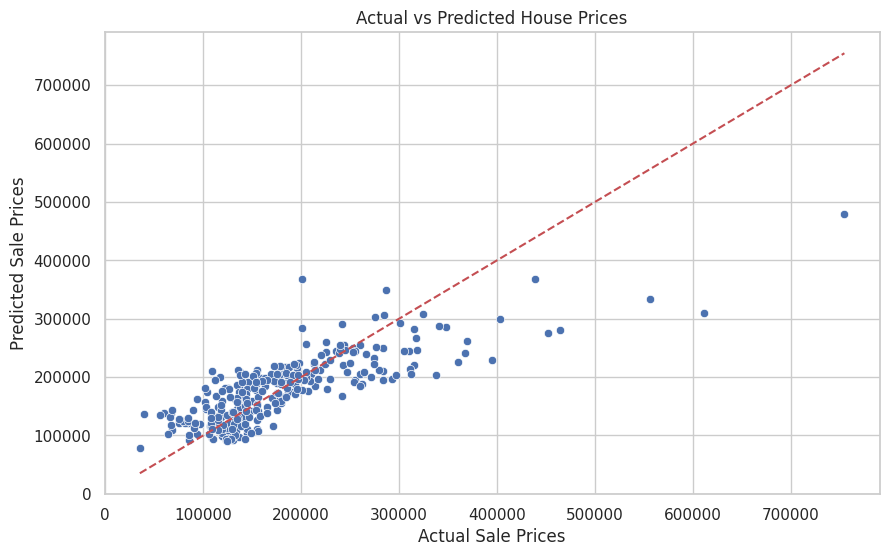

In [14]:
# Visualization 1: Actual vs Predicted House Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for perfect prediction
plt.show()


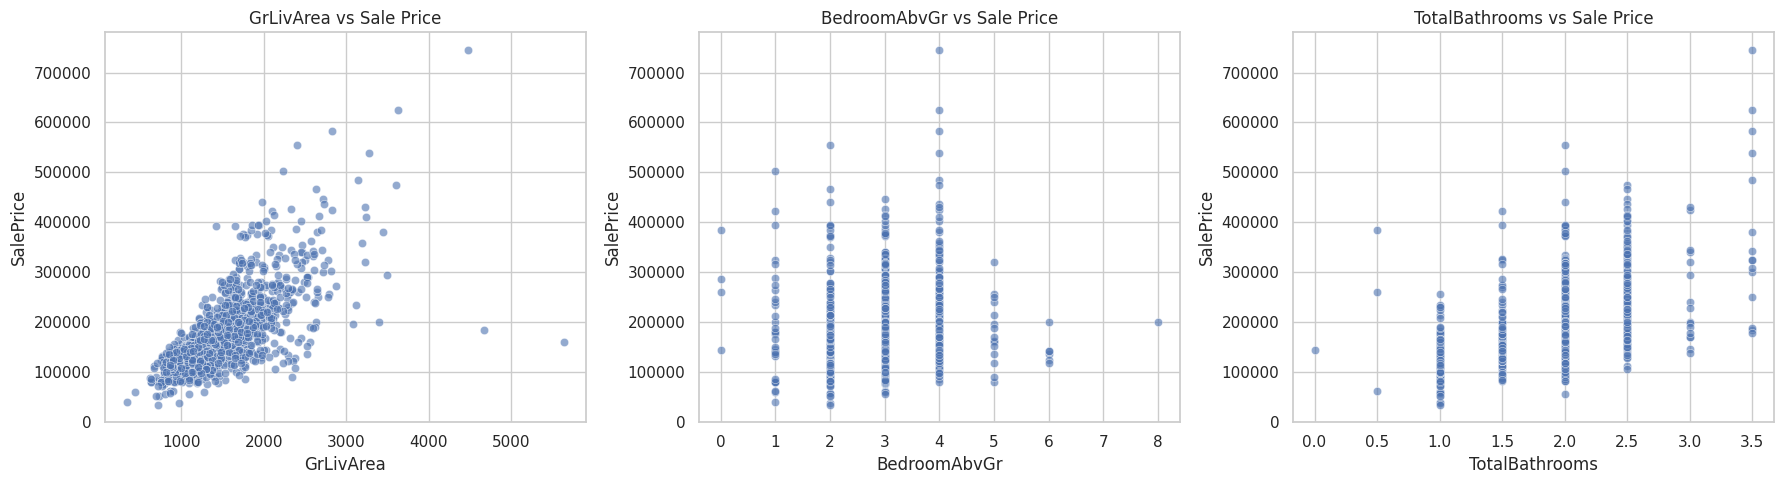

In [15]:
# Visualization 2: Feature Importance (scatter plots for visualization)
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f"{feature} vs Sale Price")

plt.tight_layout()
plt.show()



In [16]:
# Example Prediction for a New House with User Input
try:
    # Taking user input dynamically
    user_grliv_area = float(input("Enter the living area in square feet (GrLivArea): "))
    user_bedrooms = int(input("Enter the number of bedrooms (BedroomAbvGr): "))
    user_total_bathrooms = float(input("Enter the total number of bathrooms (TotalBathrooms): "))

    # Prepare user input for prediction
    new_house = np.array([[user_grliv_area, user_bedrooms, user_total_bathrooms]])
    predicted_price = model.predict(new_house)

    # Output the predicted price
    print(f"Predicted Price for the new house: ${predicted_price[0]:.2f}")
except ValueError:
    print("Invalid input. Please ensure you enter numbers only.")

Enter the living area in square feet (GrLivArea):  1000
Enter the number of bedrooms (BedroomAbvGr):  1
Enter the total number of bathrooms (TotalBathrooms):  1


Predicted Price for the new house: $157937.15


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# Generate Submission CSV File
# Predict on the entire training/test dataset
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_df['TotalBathrooms'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']

# Select the same features used for training
test_features = test_df[features]

# Predict prices for test data
predicted_test_prices = model.predict(test_features)

# Prepare the submission dataframe
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predicted_test_prices
})


In [18]:
# Save to CSV
submission_file_path = "/kaggle/working/submission.csv"
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")

Submission file created at: /kaggle/working/submission.csv
